In [32]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)



## 数据处理，规范化

In [33]:
# 将图像本身从[28,28]转换为[784,]
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [34]:
# 将数据类型转换为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 数据归一化
X_train /= 255
X_test /= 255


## 统计数据中各标签数量

In [35]:
import numpy as np
import matplotlib.pyplot as plt
label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


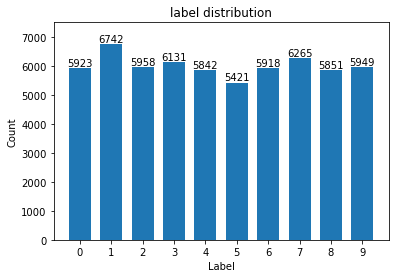

In [36]:
fig = plt.figure()
plt.bar(label, count, width=0.7, align='center')
plt.title('label distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label)
plt.ylim(0, 7500)
for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()


## 数据处理：One-hot编码

In [37]:
from keras.utils import np_utils
n_classes = 10
print("Shape before ont-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after ont-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[0])
print(Y_train[0])

Shape before ont-hot encoding:  (60000,)
Shape after ont-hot encoding:  (60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



## 使用Keras Sequential model 定义神经网络
### softmax 网络

In [38]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


## 编译模型

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='adam')


## 训练模型，并将模型保存到history中

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=5,
    verbose=2,
    validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 11s - loss: 0.2161 - accuracy: 0.9362 - val_loss: 0.0964 - val_accuracy: 0.9695
Epoch 2/5
 - 11s - loss: 0.0774 - accuracy: 0.9759 - val_loss: 0.1034 - val_accuracy: 0.9665
Epoch 3/5
 - 7s - loss: 0.0519 - accuracy: 0.9834 - val_loss: 0.0799 - val_accuracy: 0.9769
Epoch 4/5



## 可视化指标

In [ ]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc="upper right")

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.tight_layout()
plt.show()



## 保存模型 model.save()

In [ ]:
import os
import tensorflow.gfile as gfile
save_dir = "./mnist/model"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print("Saved trained model at %s" % model_path)



## 加载模型

In [ ]:
from keras.models import load_model
mnist_model = load_model(model_path)


## 统计模型在测试集上的分类结果

In [ ]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))
print(np.nonzero(predicted_classes != y_test)[0])
